In [10]:
import numpy as np
from matplotlib import pyplot
from PIL import Image
import io

### Question 73

In [11]:
def solve_73(k, m, x0, v0):
    assert k != 0
    assert m != 0
    
    omega = np.sqrt(k/m)
    xm = np.sqrt(x0 ** 2 + (v0/omega) ** 2)
    
    phi = 0
    if x0 == 0:
        phi = np.pi / 2
    else:
        phi = np.arctan(-v0/(omega * x0))
    
    if np.sign(np.cos(phi)) != np.sign(x0) or np.sign(np.sin(phi)) != np.sign(v0):
        phi += np.pi
        
    return xm, phi

In [12]:
k=200 # N/m
m=250/1000 # kg
xdata = np.array([2.8, -2.8, 0,  0,   2.8, 2.8, -2.8, -2.8]) / 1000
vdata = np.array([0,    0,   56, -56, 56, -56,   56,   -56]) / 1000
for i in range(len(xdata)):
    xm, phi = solve_73(k, m, x0=xdata[i], v0=vdata[i])
    print(f'{i+1}: xm={xm:.3f} m, phi={phi:.3f} rad')

1: xm=0.003 m, phi=-0.000 rad
2: xm=0.003 m, phi=3.142 rad
3: xm=0.002 m, phi=4.712 rad
4: xm=0.002 m, phi=4.712 rad
5: xm=0.003 m, phi=2.526 rad
6: xm=0.003 m, phi=3.757 rad
7: xm=0.003 m, phi=3.757 rad
8: xm=0.003 m, phi=2.526 rad


### Question 74

$$y_{i+1} \approx y_{i} + \frac{dy}{dx}_{i} + \delta t$$

In [13]:
def update_differential(lower, higher, time_step):
    return lower + higher * time_step

$$m\frac{d^2 x}{dt^2} = -k\vec{x}-b\vec{v}$$

In [14]:
def calculate_acceleration(displacement, velocity, spring_constant, damping_constant, mass):
    return (-spring_constant * displacement - damping_constant * velocity) / mass

$$E = K + U = \frac{1}{2} mv^2 + \frac{1}{2} kx^2$$

In [15]:
def calculate_energy(mass, velocity, spring_constant, displacement):
    K = (1/2) * mass * velocity ** 2
    U = (1/2) * spring_constant * displacement ** 2
    return K, U

In [16]:
def perform_euler_simulation(mass, spring_constant, damping_constant, 
                             initial_displacement, initial_velocity, time_step, iterations):
    time = 0
    
    displacement_data = []
    velocity_data = []
    acceleration_data = []
    kinetic_energy_data = []
    potential_energy_data = []
    
    time_data = []
    
    displacement = initial_displacement
    velocity = initial_velocity
    acceleration = 0
    
    for i in range(iterations):
        time += time_step
        acceleration = calculate_acceleration(displacement, velocity, spring_constant, damping_constant, mass)
        velocity = update_differential(velocity, acceleration, time_step)
        displacement = update_differential(displacement, velocity, time_step)
        kinetic_energy, potential_energy = calculate_energy(mass, velocity, spring_constant, displacement)
        
        acceleration_data.append(acceleration)
        velocity_data.append(velocity)
        displacement_data.append(displacement)
        kinetic_energy_data.append(kinetic_energy)
        potential_energy_data.append(potential_energy)
        time_data.append(time)
    
    return (displacement_data, velocity_data, acceleration_data, 
            kinetic_energy_data, potential_energy_data, time_data)

In [17]:
def figure_to_img(fig):
    # Convert a Matplotlib figure to a PIL Image and return it
    
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    
    return img

def graph_variable(variable_data, time_data, variable_label, energy=False):
    # Plot the energy graph and return it
    pyplot.figure(figsize=(10,3))
    graph = pyplot.gcf()
    
    pyplot.xlabel("Time (s)")
    pyplot.ylabel(variable_label)
    
    if energy:
        mechanical = np.array(variable_data[0]) + np.array(variable_data[1])
        pyplot.plot(time_data, variable_data[0], "--", label="Kinetic Energy (J)")
        pyplot.plot(time_data, variable_data[1], "--", label="Potential Energy (J)")
        pyplot.plot(time_data, mechanical,       "--", label="Mechanical Energy (J)")
        pyplot.legend()
    else:
        pyplot.plot(time_data, variable_data, "--",color = 'b')
    pyplot.grid(color='y', linestyle='-', linewidth=1) 
    
    image = figure_to_img(graph)
    pyplot.close(graph)
    return image

def solve_and_graph(mass, spring_constant, damping_constant, 
                    initial_displacement, initial_velocity, time_step, stop_time):
    iterations = int(stop_time / time_step)
    
    result_data = perform_euler_simulation(mass, spring_constant, damping_constant, 
                                           initial_displacement, initial_velocity, time_step, iterations)
    (displacement_data, velocity_data, acceleration_data, 
     kinetic_energy_data, potential_energy_data, time_data) = result_data
    energy_data = (kinetic_energy_data, potential_energy_data)
    
    displacement_graph = graph_variable(displacement_data, time_data, "Displacement (m)")
    velocity_graph     = graph_variable(velocity_data,     time_data, "Velocity (m/s)")
    acceleration_graph = graph_variable(acceleration_data, time_data, "Acceleration (m/s^2)")
    energy_graph       = graph_variable(energy_data,       time_data, "Energy (J)", energy=True)
    
    display(displacement_graph)
    display(velocity_graph)
    display(acceleration_graph)
    display(energy_graph)

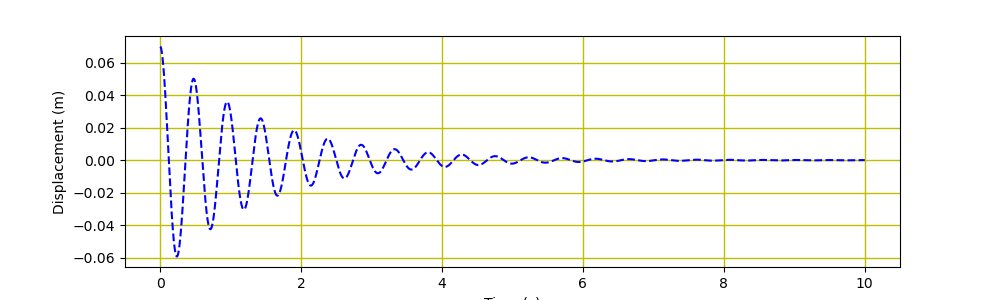

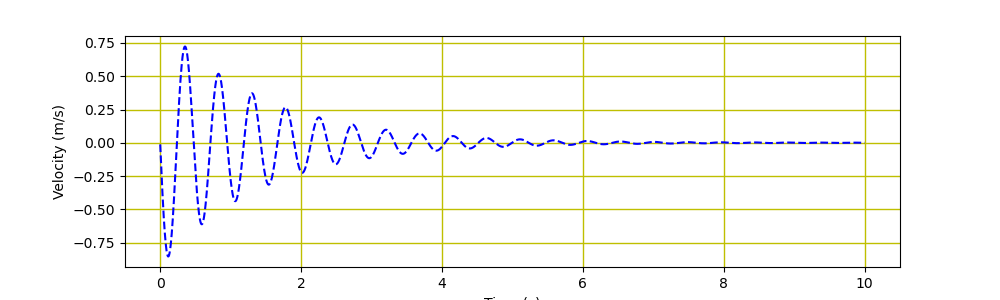

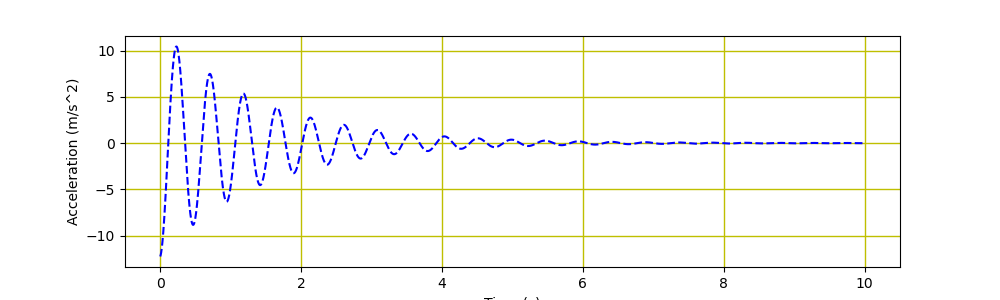

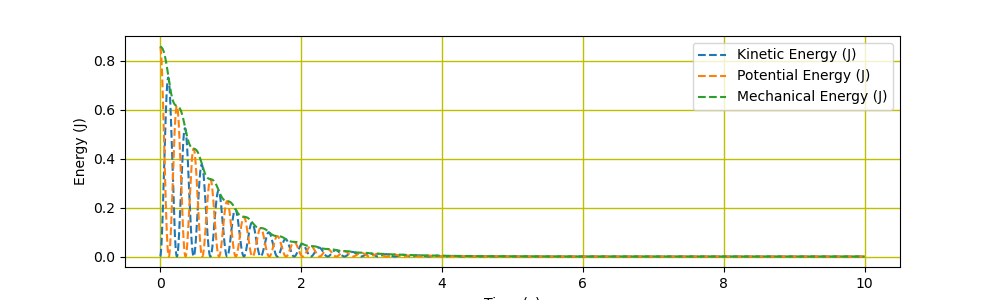

In [19]:
# Textbook Situation
solve_and_graph(mass=2, # kg 
                spring_constant=350, # N/m
                damping_constant=0, # ??
                initial_displacement=0.070, # m
                initial_velocity=0, # m/s
                time_step=0.001, # s
                stop_time=2) # s